In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = 'C:/Users/kokontsev/Desktop/Sleep-Quality-Prediction/data/processed/'

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

In [3]:
df = pd.read_csv(DATA_PATH + "sleep_activity_daily.csv")

df.head()

,user_id,sleep_date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepEfficiency,activity_date,TotalSteps,TotalDistance,Calories,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,1503960366,2016-04-12,1,327,346,0.945087,2016-04-11,13162,8.50,1985,25,13,328,728
1,1503960366,2016-04-13,2,384,407,0.943489,2016-04-12,10735,6.97,1797,21,19,217,776
2,1503960366,2016-04-15,1,412,442,0.932127,2016-04-14,9762,6.28,1745,29,34,209,726
3,1503960366,2016-04-16,2,340,367,0.926431,2016-04-15,12669,8.16,1863,36,10,221,773
4,1503960366,2016-04-17,1,700,712,0.983146,2016-04-16,9705,6.48,1728,38,20,164,539


# 2. Общая информация о данных

## 2.1. Размерность и типы

In [4]:
df.shape

(413, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               413 non-null    int64  
 1   sleep_date            413 non-null    object 
 2   TotalSleepRecords     413 non-null    int64  
 3   TotalMinutesAsleep    413 non-null    int64  
 4   TotalTimeInBed        413 non-null    int64  
 5   SleepEfficiency       413 non-null    float64
 6   activity_date         413 non-null    object 
 7   TotalSteps            413 non-null    int64  
 8   TotalDistance         413 non-null    float64
 9   Calories              413 non-null    int64  
 10  VeryActiveMinutes     413 non-null    int64  
 11  FairlyActiveMinutes   413 non-null    int64  
 12  LightlyActiveMinutes  413 non-null    int64  
 13  SedentaryMinutes      413 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 45.3+ KB


## 2.2. Число пользователей и период наблюдений

In [6]:
df["user_id"].nunique()

24

In [7]:
df["sleep_date"].min(), df["sleep_date"].max()

('2016-04-12', '2016-05-12')

# 3. Пропуски данных

In [8]:
missing = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
)

missing


user_id                 0.0
sleep_date              0.0
TotalSleepRecords       0.0
TotalMinutesAsleep      0.0
TotalTimeInBed          0.0
SleepEfficiency         0.0
activity_date           0.0
TotalSteps              0.0
TotalDistance           0.0
Calories                0.0
VeryActiveMinutes       0.0
FairlyActiveMinutes     0.0
LightlyActiveMinutes    0.0
SedentaryMinutes        0.0
dtype: float64

# 4. Анализ целевой переменной (сон)

## 4.1. Распределение SleepEfficiency

In [9]:
df["SleepEfficiency"].describe()

count    413.000000
mean       0.916769
std        0.087039
min        0.498361
25%        0.912181
50%        0.943128
75%        0.960688
max        1.000000
Name: SleepEfficiency, dtype: float64

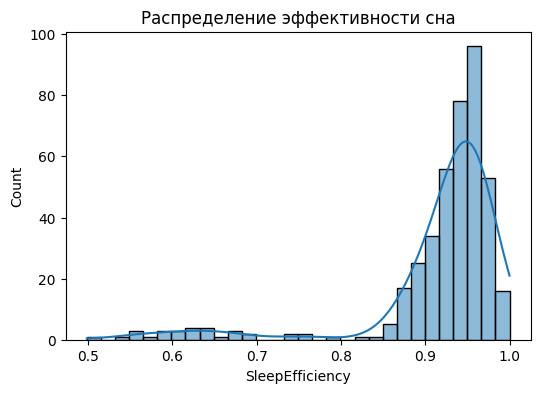

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(df["SleepEfficiency"], bins=30, kde=True)
plt.title("Распределение эффективности сна")
plt.xlabel("SleepEfficiency")
plt.show()

## 4.2. Выбросы

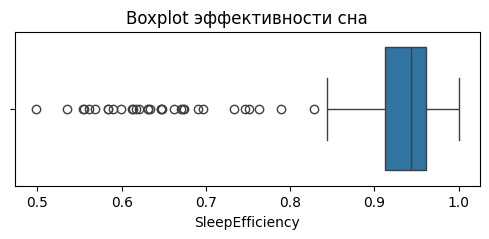

In [11]:
plt.figure(figsize=(6, 2))
sns.boxplot(x=df["SleepEfficiency"])
plt.title("Boxplot эффективности сна")
plt.show()

# 5. Анализ физической активности

## 5.1. Базовые показатели

In [12]:
activity_cols = [
    "TotalSteps",
    "Calories",
    "VeryActiveMinutes",
    "FairlyActiveMinutes",
    "LightlyActiveMinutes",
    "SedentaryMinutes"
]

df[activity_cols].describe()


,TotalSteps,Calories,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,8541.140436,2397.573850,25.188862,18.038741,216.854722,712.169492
std,4156.926990,762.886326,36.388187,22.403590,87.164687,165.957432
min,17.000000,257.000000,0.000000,0.000000,2.000000,0.000000
25%,5206.000000,1850.000000,0.000000,0.000000,158.000000,631.000000
50%,8925.000000,2220.000000,9.000000,11.000000,208.000000,717.000000
75%,11393.000000,2926.000000,38.000000,27.000000,263.000000,783.000000
max,22770.000000,4900.000000,210.000000,143.000000,518.000000,1265.000000


## 5.2. Корреляции активности между собой

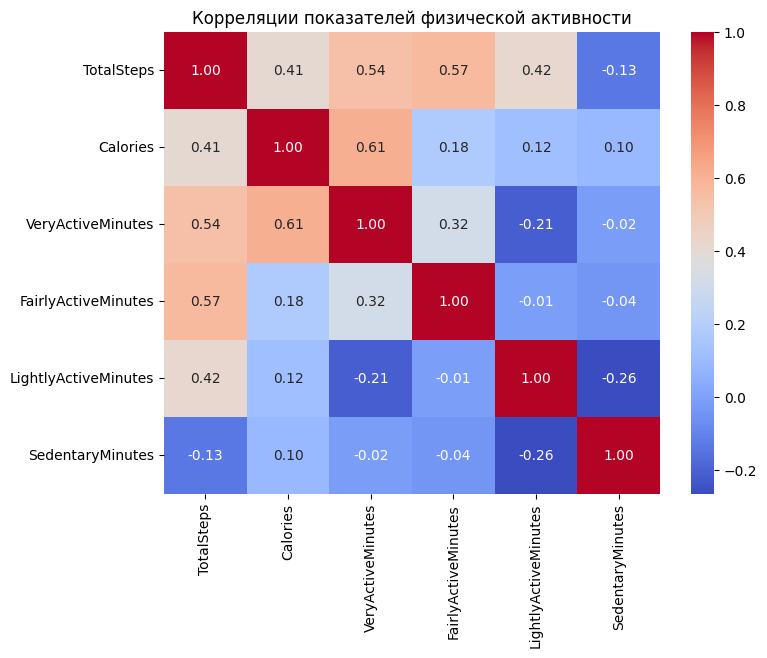

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[activity_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)
plt.title("Корреляции показателей физической активности")
plt.show()


# 6. Связь активности и сна

## 6.1. Корреляции с целевой переменной

In [14]:
corr_with_sleep = (
    df[activity_cols + ["SleepEfficiency"]]
    .corr()["SleepEfficiency"]
    .sort_values(ascending=False)
)

corr_with_sleep

SleepEfficiency         1.000000
Calories                0.297265
LightlyActiveMinutes    0.132308
VeryActiveMinutes       0.063559
SedentaryMinutes        0.019676
TotalSteps             -0.106421
FairlyActiveMinutes    -0.441916
Name: SleepEfficiency, dtype: float64

## 6.2. Scatter-пары (2–3 ключевых)

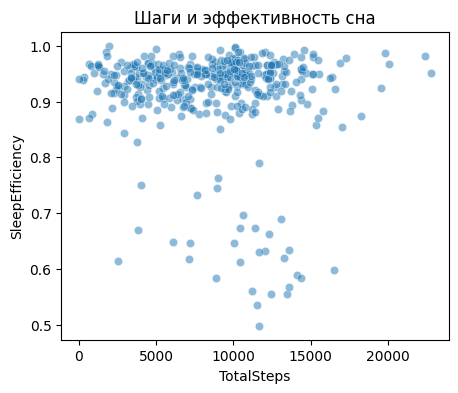

In [15]:
plt.figure(figsize=(5, 4))
sns.scatterplot(
    data=df,
    x="TotalSteps",
    y="SleepEfficiency",
    alpha=0.5
)
plt.title("Шаги и эффективность сна")
plt.show()

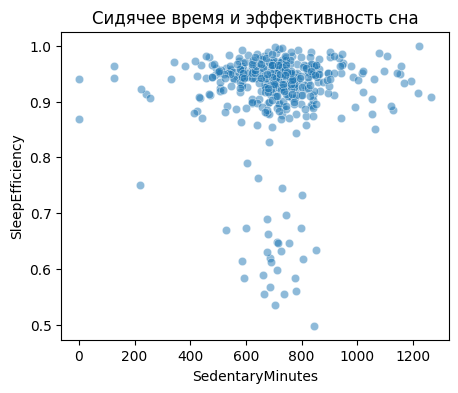

In [16]:
plt.figure(figsize=(5, 4))
sns.scatterplot(
    data=df,
    x="SedentaryMinutes",
    y="SleepEfficiency",
    alpha=0.5
)
plt.title("Сидячее время и эффективность сна")
plt.show()


# 7. Пользовательская вариативность

## 7.1. Средние значения по пользователям

In [17]:
user_stats = (
    df.groupby("user_id")["SleepEfficiency"]
      .agg(["mean", "std", "count"])
      .sort_values("count", ascending=False)
)

user_stats.head()


,mean,std,count
user_id,,,
8378563200,0.918998,0.030135,32
5553957443,0.915207,0.031197,31
6962181067,0.961487,0.024698,31
3977333714,0.633669,0.070486,28
4445114986,0.925389,0.026147,28


## Предварительные выводы разведочного анализа данных (EDA)

В ходе разведочного анализа данных физической активности и сна были изучены структура датасета, наличие пропусков, распределения основных показателей, а также связи между физической активностью и качеством сна.

### 1. Общая характеристика данных

Итоговый датасет содержит данные по ограниченному числу пользователей, наблюдаемых в течение сравнительно короткого временного периода. Каждая строка таблицы соответствует одной ночи сна конкретного пользователя и связана с показателями физической активности за предыдущий день.

Такой объём и структура данных являются типичными для данных, получаемых с носимых устройств, и допустимы для решения поставленной исследовательской задачи.

---

### 2. Пропуски и качество данных

В данных присутствуют пропуски, в основном в признаках, характеризующих физическую активность. Показатели сна при этом заполнены для большинства наблюдений.

Вероятнее всего, пропуски связаны с тем, что пользователь не носил устройство в отдельные дни или данные не были корректно зафиксированы. Это требует дополнительной очистки данных и обработки пропусков на следующих этапах работы.

---

### 3. Распределение целевой переменной

Показатель эффективности сна (SleepEfficiency) имеет несимметричное распределение и содержит выбросы. Основная часть наблюдений сосредоточена в диапазоне средних и высоких значений, однако присутствуют отдельные случаи с очень низкой эффективностью сна.

Наличие выбросов указывает на необходимость аккуратной работы с данными и обоснованного выбора методов моделирования.

---

### 4. Анализ физической активности

Показатели физической активности, такие как количество шагов, затраченные калории и минуты активности различной интенсивности, характеризуются высокой вариативностью и широким диапазоном значений.

Корреляционный анализ показал, что некоторые показатели активности сильно связаны между собой, что может привести к избыточности признаков и должно быть учтено при дальнейшем построении моделей.

---

### 5. Связь физической активности и качества сна

Анализ зависимостей между показателями физической активности и эффективностью сна показал, что прямые связи в большинстве случаев являются слабыми или умеренными.

Это означает, что влияние физической активности на качество сна носит сложный характер и не может быть адекватно описано только простыми линейными зависимостями.

---

### 6. Различия между пользователями

Анализ показателей сна в разрезе пользователей выявил заметные различия как в среднем уровне эффективности сна, так и в её изменчивости.

Это говорит о том, что сон и физическая активность имеют выраженные индивидуальные особенности, которые необходимо учитывать при построении прогнозных моделей.

---

### 7. Выводы для дальнейшего анализа

На основе проведённого разведочного анализа можно сделать следующие выводы:

- данные требуют дополнительной очистки и обработки пропусков;
- необходимо формирование новых признаков на основе исходных данных;
- в качестве базовой модели целесообразно использовать линейную регрессию;
- для улучшения качества прогнозирования следует рассмотреть более сложные модели машинного обучения.

Полученные результаты используются в дальнейшем для этапа feature engineering и построения моделей прогнозирования качества сна.
